This tutorial explains how to make a 2 layers neuronal network using forward-propagation and back-Propagation concepts.

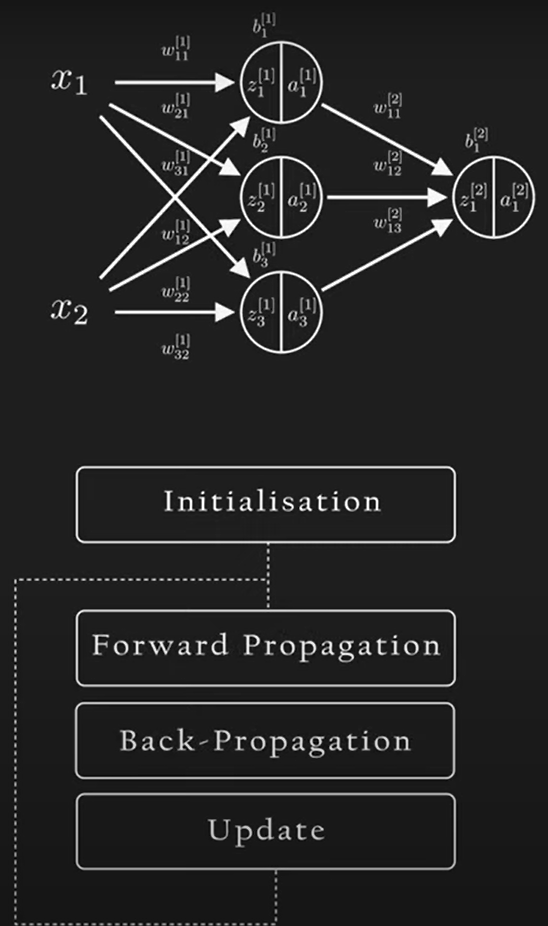
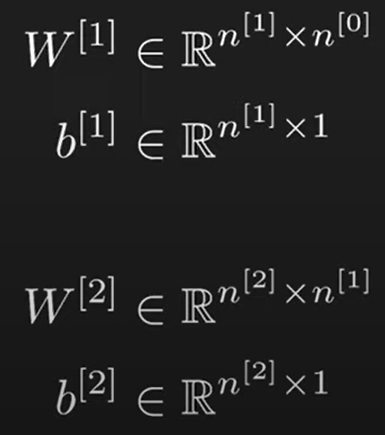
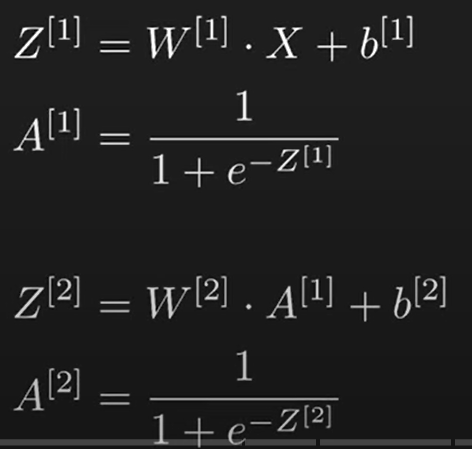

1 - DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

dimensions of X: (2, 100)
dimensions of y: (1, 100)


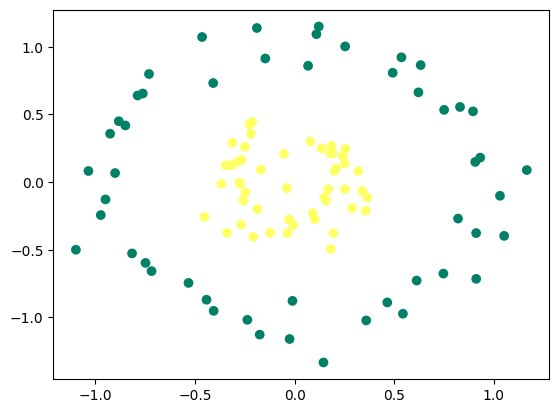

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions of X:', X.shape)
print('dimensions of y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

2 - Functions definitions

n0: number of imputs of the neural network<br>
n1: number of the neurons in layer 1<br>
n2: number of neurons in layer 2

In [3]:
def initialization(n0, n1, n2):
    W1, W2 = np.random.randn(n1,n0), np.random.randn(n2, n1)
    b1, b2 = np.zeros((n1, 1)), np.zeros((n2, 1))
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params

- Forward propagation:

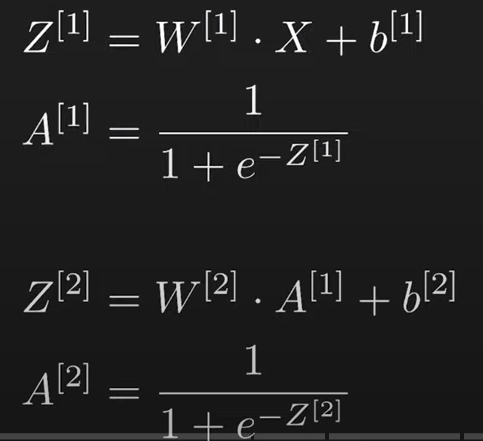

In [4]:
def forward_propagation(params, X):
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']

    #print('forward_propagation: W1 {}, W2 {}'.format(W1.shape, W2.shape))

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    Activation = {'A1': A1, 'A2': A2}
    return Activation

- Loss function / Log Loss:



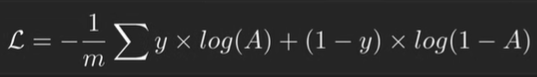

In [5]:
def log_loss2(A, y):
    epsilon = 1e-15
    A = A + epsilon
    loss_function = -1 / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss_function

- Back Propagation:

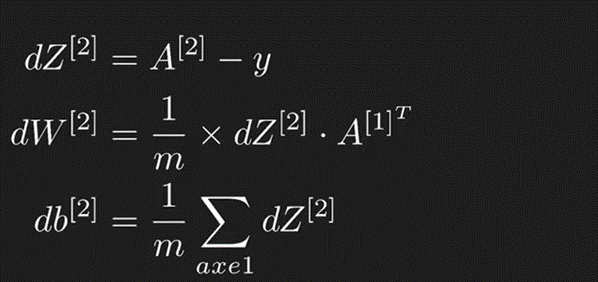
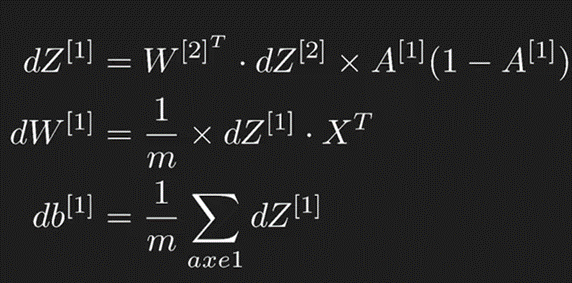

In [6]:
def back_propagation(Activation, params, X, y):
    A1, A2 = Activation['A1'], Activation['A2']
    W2 = params['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return gradients

 - Update function:


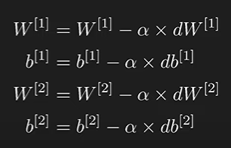

In [7]:
def update(params, gradients, learning_rate):
    W1, W2 = params['W1'], params['W2']
    b1, b2 = params['b1'], params['b2']
    dW1, dW2 = gradients['dW1'], gradients['dW2']
    db1, db2 = gradients['db1'], gradients['db2']

    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params

3 - Artificial Neuron

In [8]:
def predict(X, params):
    Activation = forward_propagation(params, X)
    A2 = Activation['A2']
    return A2 >= 0.5


In [9]:
def plot_decision_boundary(X, y, params):
    x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

    xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    x_in = np.c_[(xx.ravel(), yy.ravel())].T
    A2 = predict(x_in, params).reshape(xx.shape)

    plt.contourf(xx, yy, A2, cmap=plt.cm.RdYlBu, alpha=0.7)
    #plt.legend()
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

In [10]:

def neural_network(X, y, n1=32, learning_rate = 0.1, n_iter = 1000):
    # Params initialization
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    params = initialization(n0, n1, n2)

    train_loss = []
    train_acc = []
    hist = []

    # gradient descent
    for i in tqdm(range(n_iter)):
        Activation = forward_propagation(params, X)
        A2 = Activation['A2']

        # Plot learning curve
        lloss = log_loss(y.flatten(), A2.flatten())
        y_pred = predict(X, params)
        accu_score = accuracy_score(y.flatten(), y_pred.flatten())

        train_loss.append(lloss)
        train_acc.append(accu_score)
        hist.append([lloss, accu_score, i])

        # Update
        gradients = back_propagation(Activation, params, X, y)
        params = update(params, gradients, learning_rate)

    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss n1={}'.format(n1))
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc n1={}'.format(n1))
    plt.legend()
    plt.subplot(1, 3, 3)
    plot_decision_boundary(X=X.T,y=y,params=params)
    plt.show()
    return params

4 - Decision boundary

100%|██████████| 1000/1000 [00:00<00:00, 1138.91it/s]


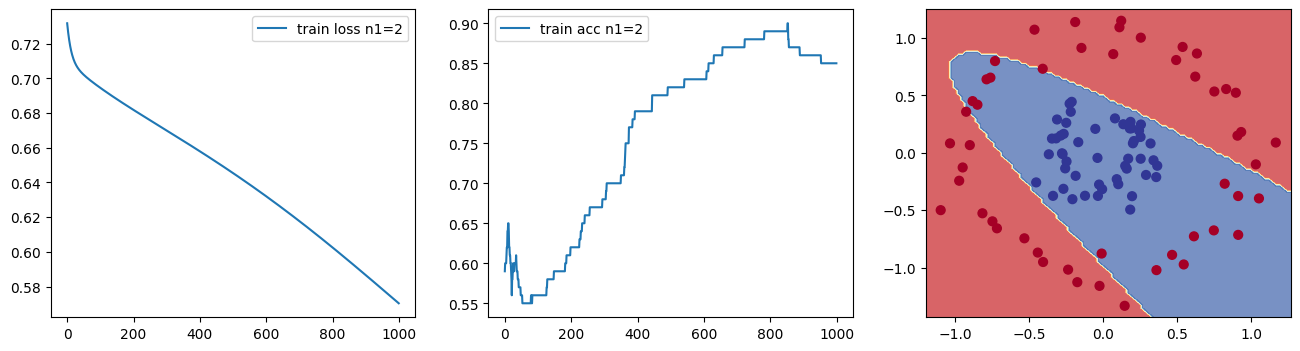

100%|██████████| 1000/1000 [00:00<00:00, 1157.41it/s]


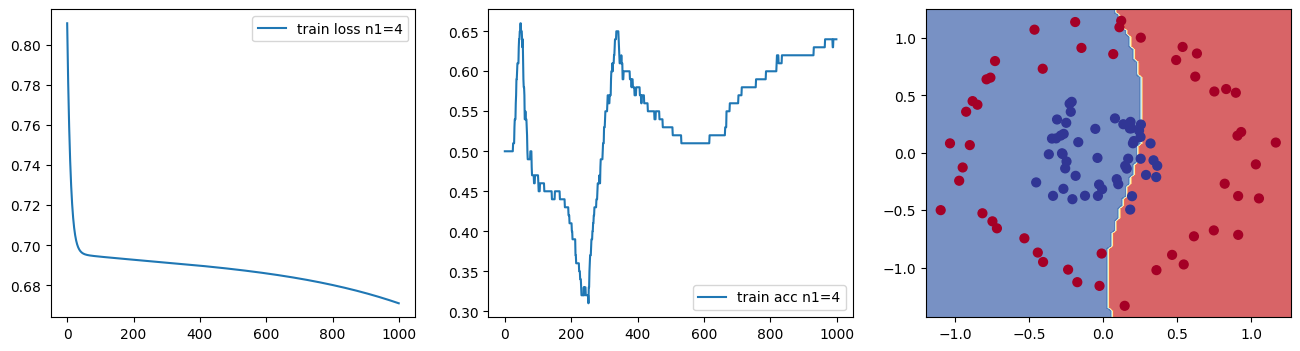

100%|██████████| 1000/1000 [00:00<00:00, 1154.69it/s]


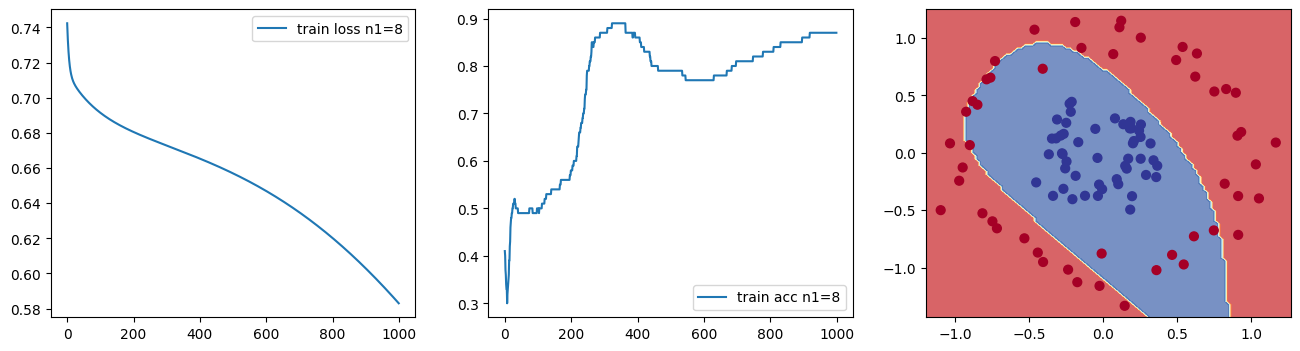

100%|██████████| 1000/1000 [00:01<00:00, 873.37it/s]


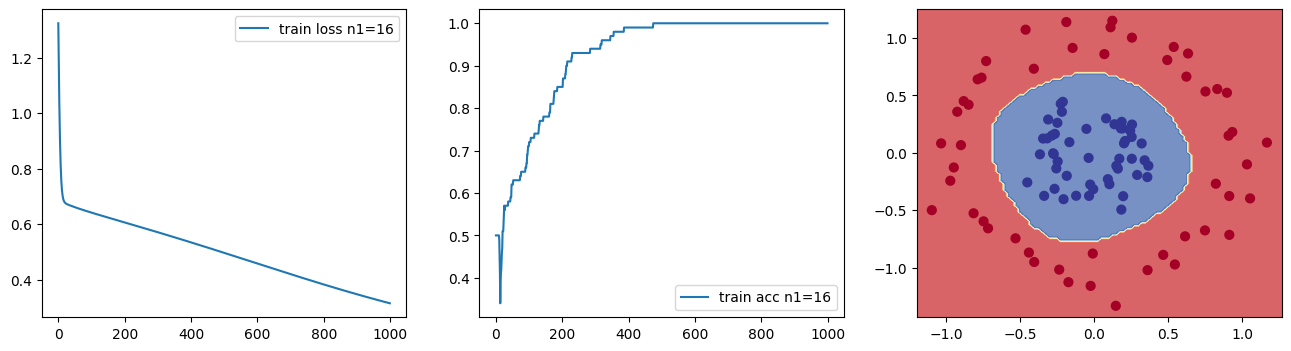

100%|██████████| 1000/1000 [00:01<00:00, 756.41it/s]


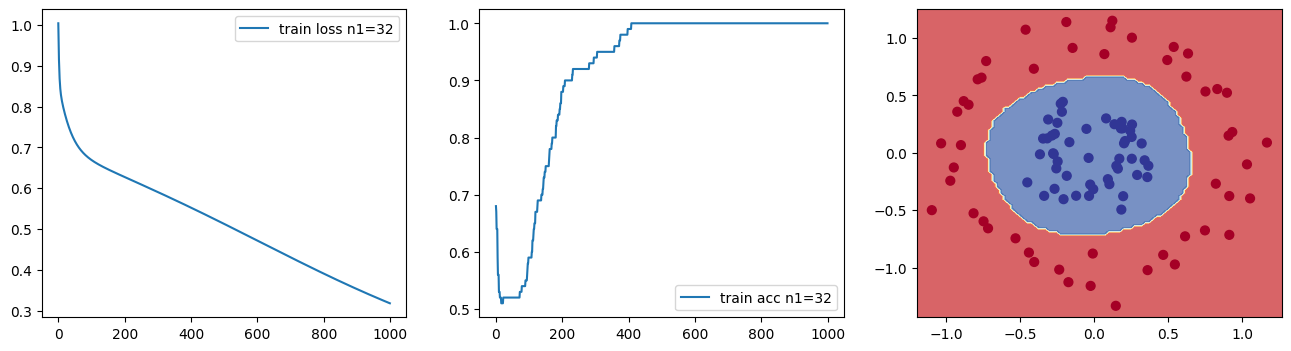

In [11]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
XT = X.T
yReshap = y.reshape((1, y.shape[0]))
Layers = [2, 4, 8, 16, 32]
for l in Layers:
    params= neural_network(XT, yReshap, n1=l)

5 - 3D Vizualization

In [12]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

x_in = np.c_[(xx.ravel(), yy.ravel())].T
A2 = predict(x_in, params).reshape(xx.shape).astype(int)

fig = (go.Figure(data=[go.Surface(z=A2, x=xx, y=yy, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(),
                  mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn',
                                              opacity = 0.9, reversescale=True))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()